# ibis expr tests

In [1]:
import ibis
import pandas as pd
# local
from settings import conf
from utils import cursor2df

### Setup

In [2]:
BACKENDS = ['omniscidb']
con = {
    backend: getattr(ibis, backend).connect(**conf[backend]) 
    for backend in BACKENDS
}

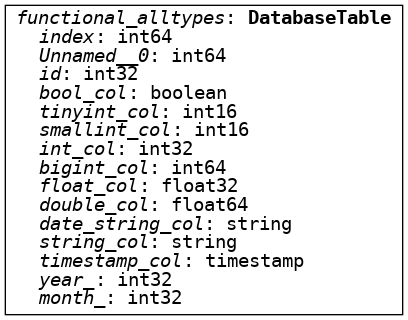

In [3]:
t = con['omniscidb'].table('functional_alltypes')
t

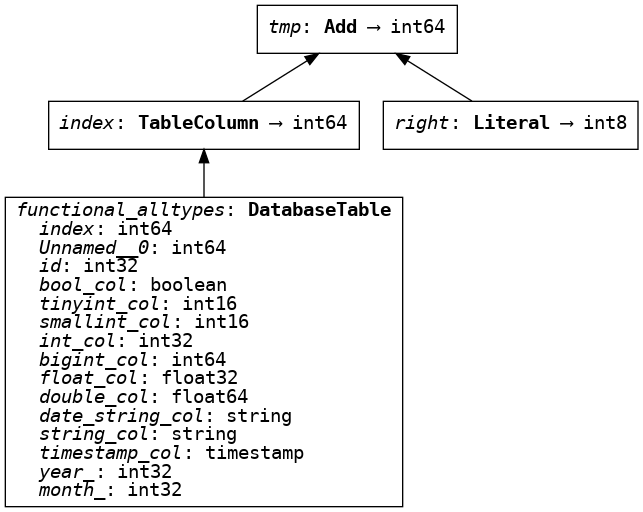

In [4]:
expr = (t['index'] + 1).name('tmp')
expr

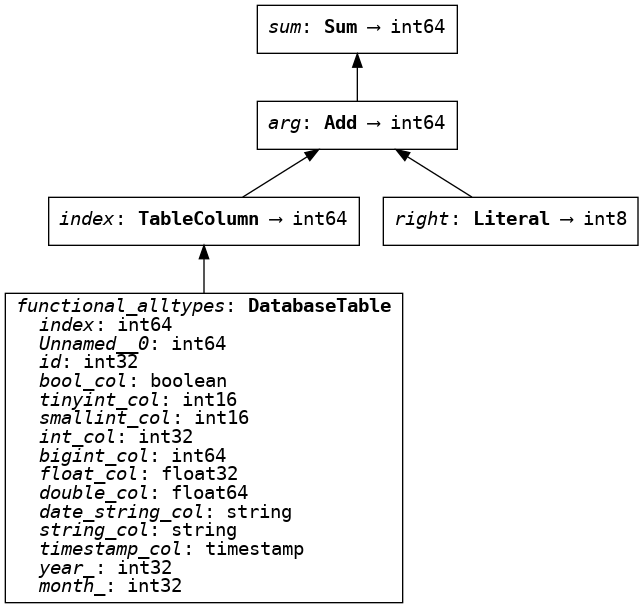

In [5]:
expr.sum()

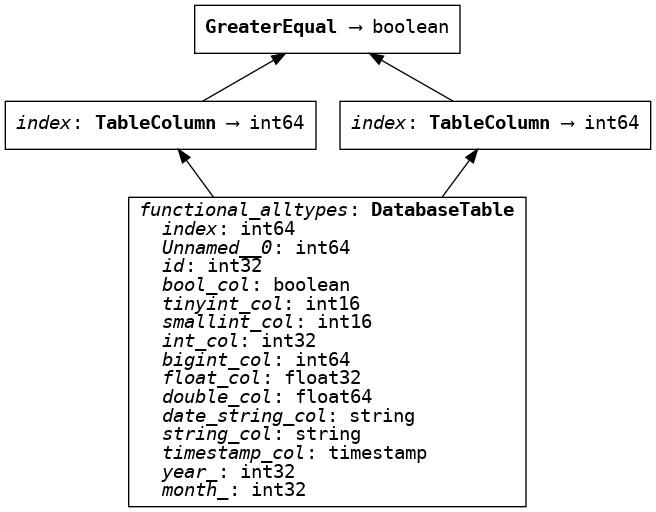

In [11]:
t['index'] >= t['index']

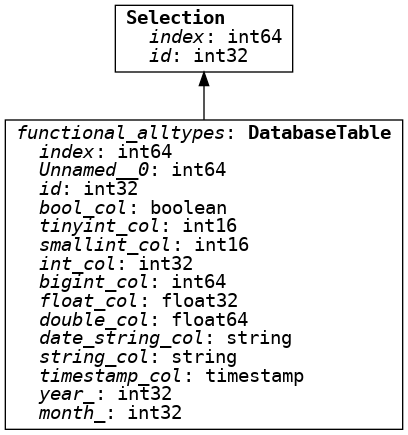

In [7]:
t[['index', 'id']]

In [37]:
type((t['index'] + t['index'])._arg)

ibis.expr.operations.Add

In [39]:
type((t['index'] + t['index']).parent())

ibis.expr.operations.Add

In [40]:
type(t['index'] + t['index'])

ibis.expr.types.IntegerColumn

In [41]:
import pandas as pd
help(pd.testing.assert_series_equal)

Help on function assert_series_equal in module pandas._testing:

assert_series_equal(left, right, check_dtype=True, check_index_type='equiv', check_series_type=True, check_less_precise=False, check_names=True, check_exact=False, check_datetimelike_compat=False, check_categorical=True, obj='Series')
    Check that left and right Series are equal.
    
    Parameters
    ----------
    left : Series
    right : Series
    check_dtype : bool, default True
        Whether to check the Series dtype is identical.
    check_index_type : bool or {'equiv'}, default 'equiv'
        Whether to check the Index class, dtype and inferred_type
        are identical.
    check_series_type : bool, default True
        Whether to check the Series class is identical.
    check_less_precise : bool or int, default False
        Specify comparison precision. Only used when check_exact is False.
        5 digits (False) or 3 digits (True) after decimal points are compared.
        If int, then specify the di